In [1]:
import pandas as pd
import numpy as np
import requests
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# считываем информацию со ссылок с помощью библиотеки requests в три разные переменные

api_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download'
url = 'https://disk.yandex.ru/d/FUi5uSd6BfG_ig'

dict_urls = {'customers': 'https://disk.yandex.ru/d/QXrVDUoQvFhIcg',
             'orders': 'https://disk.yandex.ru/d/0zWmh1bYP6REbw',
             'order_items': 'https://disk.yandex.ru/d/xCsQ0FiC-Ue4Lg'}

for i in dict_urls:
    download_url = requests.get(api_url + '?public_key=' + dict_urls[i]).json()['href']
    if i == 'customers':
        df_customers = pd.read_csv(download_url)
    elif i == 'orders':
        df_orders = pd.read_csv(download_url)
    elif i == 'order_items':
        df_order_item = pd.read_csv(download_url)

In [3]:
# таблица кастомер из файла https://disk.yandex.ru/d/FUi5uSd6BfG_ig
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
# таблица orders из файла https://disk.yandex.ru/d/t9Li4JOfgxuUrg
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [5]:
# таблица order item из файла https://disk.yandex.ru/d/Gbt-yAcQrOe3Pw
df_order_item.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [7]:
# формируем датафрейм с пользователями и их заказами, дополнительно фильтруем только оплаченные заказы

df_customers_with_payment_orders = df_customers.merge(df_orders, on='customer_id').query('order_approved_at.notna()').copy()
df_customers_with_payment_orders['order_purchase_timestamp']=pd\
    .to_datetime(df_customers_with_payment_orders['order_purchase_timestamp'], format='%Y-%m-%d')

<h2>Задача</h2>
<p>Вопрос: используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию. (35 баллов)</p>
<p>Ответ: результат RFM-сегментации находится в df_final_rfm. В ней можно выбрать интересующий нас сегмент и нужные нам id пользователей для последующего использования.</p>
<p>Вывод: с каждый сегментом нужно работать индивидуально. Методы работы описал в таблице ниже «Логика RFM сегментации».</p>

In [8]:
'''
Обратил внимание на то, что если мы мёрджим таблицу с оплаченными заказами и информацией по товарам, то мы теряем часть заказов
и пользователей.

Сначала думал, что нужно пересчитать, но потом убедился, что в этом нет смысла. Для сегментирования нам нужны все данные, если
сумма заказов (revenue) будет равно 0, то эти сегменты не дадут никакой ценной информации.

Например, у нас есть пользователь, у которого следующие оценки:
— последняя дата заказа была 10 дней назад;
— он заказывал в среднем 1 раз в год;
— сумма заказа равна 0 рублей.
Видимо этот пользователь либо отменил заказ, либо статус недоступен. В данной методологии нам это никакой информации к действию
не даёт.

Поэтому рассматриваем только те заказы и клиентов, которые являются покупателями и по которым есть информация о товарах.
'''
df_parent_6_task = df_customers_with_payment_orders \
                [['customer_unique_id', 'order_purchase_timestamp', 'order_id']].merge(df_order_item, on='order_id').copy()

In [9]:
'''
Сначала найдём recency, frequency, monetary

Под каждую переменную будем создавать отдельный датафрейм и потом сведём их все в один.

Начинаем с Recency:
фильтруем только нужные столбцы,
считаем дату последнего заказа.
'''

df_recency_6 = df_parent_6_task[['customer_unique_id', 'order_purchase_timestamp']].copy()
df_recency_6['last_date_purchase'] = df_recency_6.groupby('customer_unique_id')['order_purchase_timestamp'].transform('max')

'''
Чтобы как-то оценить давность заказов, предположим что мы делаем RFM анализ 10 сентября 2018 года,
это начало следующей недели с момента последнего заказа(максимальная дата заказа).
Считаем количество дней со дня последнего заказа: дата проведения анализа - последняя дата заказ + 1.
Добавил Единицу, чтобы округлить часы в большую сторону.

После убираем дублированные данные и убираем лишнюю колонку.
'''

date_analysis = pd.to_datetime('2018-09-10 08:00:00')
df_recency_6['count_days_without_order']=(date_analysis-df_recency_6.last_date_purchase).dt.days+1

df_recency_6.drop_duplicates(subset=['customer_unique_id', 'last_date_purchase', 'count_days_without_order'], inplace=True)
df_recency_6.drop('order_purchase_timestamp', axis=1, inplace=True)
df_recency_6.head(10)

,customer_unique_id,last_date_purchase,count_days_without_order
0,861eff4711a542e4b93843c6dd7febb0,2017-05-16 15:05:35,482
1,290c77bc529b7ac935b93aa66c333dc3,2018-01-12 20:48:24,241
2,060e732b5b29e8181a18229c7b0b2b5e,2018-05-19 16:07:45,114
3,259dac757896d24d7702b9acbbff3f3c,2018-03-13 16:06:38,181
4,345ecd01c38d18a9036ed96c73b8d066,2018-07-29 09:51:30,43
5,4c93744516667ad3b8f1fb645a3116a4,2017-10-15 12:44:13,330
6,addec96d2e059c80c30fe6871d30d177,2018-02-19 14:38:35,203
7,57b2a98a409812fe9618067b6b8ebe4f,2017-11-16 19:29:02,298
8,1175e95fb47ddff9de6b2b06188f7e0d,2018-01-18 12:35:45,235
9,9afe194fb833f79e300e37e580171f22,2018-01-08 11:22:34,245


In [10]:
'''
Считаем frequency.

Так как наши пользователи делают заказы(99% пользователей сделали 1-3 заказа за всё время),
то считаем частоту заказов в год. То есть сколько раз в год каждый пользователь совершает заказ.

Фильтруем нужные данные,
высчитываем год даты заказа,

собираем года в список по пользователю,
считаем количество заказов на пользователя(длина получивщегося списка),
делим количество заказов на количество лет.

Например у нас есть пользователь у которого 3 заказа: 2016, 2017, 2018. Получается, что его частота покупок 1 раз в год.
Всего количество заказов делённое на количество годов.

Для того, чтобы понять как это работает посмотрите результат по запросу: df_frequency_6.query('count_order==2')

'''

df_frequency_6 = df_parent_6_task[['customer_unique_id', 'order_purchase_timestamp']].copy()
df_frequency_6['year_purchase'] = df_frequency_6.order_purchase_timestamp.dt.year

df_frequency_6 = df_frequency_6.groupby('customer_unique_id')['year_purchase'].apply(list).to_frame().reset_index()
df_frequency_6['count_order'] = df_frequency_6.year_purchase.apply(len)
df_frequency_6['frequency_order_in_year'] = df_frequency_6.count_order.values / df_frequency_6.year_purchase.apply(set).apply(len)
df_frequency_6.query('count_order==2')

,customer_unique_id,year_purchase,count_order,frequency_order_in_year
7,00053a61a98854899e70ed204dd4bafe,"[2018, 2018]",2,2.0
18,000de6019bb59f34c099a907c151d855,"[2017, 2017]",2,2.0
25,001147e649a7b1afd577e873841632dd,"[2017, 2017]",2,2.0
32,0015752e079902b12cd00b9b7596276b,"[2018, 2018]",2,2.0
35,001926cef41060fae572e2e7b30bd2a4,"[2017, 2017]",2,2.0
...,...,...,...,...
95357,ffdf771c03dd683f1ed7017ae4e9efb2,"[2018, 2018]",2,2.0
95361,ffe254cc039740e17dd15a5305035928,"[2017, 2017]",2,2.0
95374,ffe96201d466b0e0dc8139850be29d5d,"[2018, 2018]",2,2.0
95396,fff7219c86179ca6441b8f37823ba3d3,"[2017, 2017]",2,2.0


In [11]:
'''
Считаем monetary.

сначала фильтруем нужные данные,
так как у нас каждый товар в новой строке, то складываем цену по всем покупкам и группируем по пользователю,
переименовываем столбец в revenue
'''

# надо посчитать сколько всего денег принёс клиент за весь период данных

df_monetary_6 = df_parent_6_task[['customer_unique_id', 'price']].copy()
df_monetary_6 = df_monetary_6.groupby(['customer_unique_id'], as_index=False)['price'].sum()
df_monetary_6.rename(columns={'price': 'revenue'}, inplace=True)

In [12]:
'''
Далее сводим следующие датафреймы:
df_recency_6
df_frequency_6
df_monetary_6

В один, финальный датафрейм df_final_rfm
'''


df_final_rfm = pd.DataFrame(df_parent_6_task.customer_unique_id.unique(), columns=['customer_unique_id'])
df_final_rfm = df_final_rfm.merge(df_recency_6[['customer_unique_id', 'count_days_without_order']], on='customer_unique_id')
df_final_rfm = df_final_rfm.merge(df_frequency_6[['customer_unique_id', 'frequency_order_in_year']], on='customer_unique_id')
df_final_rfm = df_final_rfm.merge(df_monetary_6, on='customer_unique_id')

df_final_rfm.head()

,customer_unique_id,count_days_without_order,frequency_order_in_year,revenue
0,861eff4711a542e4b93843c6dd7febb0,482,1.0,124.99
1,290c77bc529b7ac935b93aa66c333dc3,241,1.0,289.00
2,060e732b5b29e8181a18229c7b0b2b5e,114,1.0,139.94
3,259dac757896d24d7702b9acbbff3f3c,181,1.0,149.94
4,345ecd01c38d18a9036ed96c73b8d066,43,1.0,230.00


In [13]:
'''
Считаем r

для того чтобы разаделить r на несколько интервалов, я решил использовать функцию qcut,
в данном случае она хорошо работает и весь отрезок разбивает почти на равные части:

(6.999, 161.0]: 31950 → 3
(161.0, 302.0]: 31656 → 2
(302.0, 736.0]: 31801 → 1

1 — давние клиенты;
2 — относительно недавние клиенты;
3 — недавние клиенты.

'''


df_final_rfm['r'] = 4-pd.qcut(df_final_rfm.count_days_without_order.sort_values(), q=3, labels=[1, 2, 3]).astype('int')

In [14]:
'''
Находим F

Клиенты в нашем интернет-магазине заказывают очень редко.
Поэтому для оценки частотности напишем функцию, которая будет делить весь отрезок на 3 неравные части:
— 1 это клиенты, которые заказали всего один раз (~88%)
— 2 это клиенты, которые заказали от 2 до 3 раз включительно (~11%)
— 3 это клиенты, которые заказали более 3 раз (~1%)
'''

def find_f(x):
    if x<=1:
        return 1
    elif x>=2 or x<=3:
        return 2
    elif x>3:
        return 3

df_final_rfm['f'] = df_final_rfm.frequency_order_in_year.apply(find_f)

In [15]:
'''
Находим M

Для его нахождения будем использовать функцию qcut, чтобы разбить весь числовой отрезок на 3 равные части.

(0.849, 58.9]: 31872 → 1
(58.9, 128.9]: 31743 → 2
(128.9, 13440.0]: 31792 → 3

1 — маленькая сумма;
2 — средняя сумма;
3 — большая сумма.
'''

df_final_rfm['m'] = pd.qcut(df_final_rfm.revenue.sort_values(), q=3, labels=[1, 2, 3])

In [16]:
'''
Считаем RFM
'''

df_final_rfm['RFM'] = df_final_rfm.r.astype('str')+df_final_rfm.f.astype('str')+df_final_rfm.m.astype('str')

<h2>Логика RFM сегментации</h2>

Источник → https://www.unisender.com/ru/blog/idei/rfm-analiz/

Разделим все получившиеся числовые сегменты на группы и подгруппы. Подробнее описал ниже.

<h2>Уходящие</h2>
<table>
<tbody>
<tr>
<td><b>Сегмент</b></td>
<td><b>Характеристика</b></td>
<td><b>Что отправляем</b></td>
</tr>
<tr>
<td><span style="font-weight: 400;">111</span></td>
<td><span style="font-weight: 400;">Потерянные экономные</span></td>
<td rowspan="3"><span style="font-weight: 400;">Скорее всего, эти клиенты уже ушли от нас, и не стоит тратить слишком больших усилий на этот сегмент.&nbsp;</span><span style="font-weight: 400;">Отправляем автоматическую цепочку реактивации.</span></td>
</tr>
<tr>
<td><span style="font-weight: 400;">112</span></td>
<td><span style="font-weight: 400;">Одноразовые</span></td>
</tr>
<tr>
<td><span style="font-weight: 400;">113</span></td>
<td><span style="font-weight: 400;">Одноразовые</span></td>
</tr>
<tr>
<td><span style="font-weight: 400;">121</span></td>
<td rowspan="3"><span style="font-weight: 400;">Уходящие редкие</span></td>
<td rowspan="3"><span style="font-weight: 400;">Эти клиенты сделали у нас несколько покупок, а потом перестали покупать.&nbsp;</span><span style="font-weight: 400;">Их можно попытаться вернуть и обязательно получить обратную связь, почему они от нас ушли.&nbsp;</span><span style="font-weight: 400;">Отправляем реактивационную рассылку с опросом.</span></td>
</tr>
<tr>
<td><span style="font-weight: 400;">122</span></td>
</tr>
<tr>
<td><span style="font-weight: 400;">123</span></td>
</tr>
<tr>
<td><span style="font-weight: 400;">131</span></td>
<td><span style="font-weight: 400;">Уходящие постоянные</span></td>
<td rowspan="3"><span style="font-weight: 400;">Этих клиентов обязательно нужно попытаться вернуть.&nbsp;</span><span style="font-weight: 400;">Отправляем им реактивационные письма, запрашиваем обратную связь, предлагаем бонусы, программы лояльности.</span></td>
</tr>
<tr>
<td><span style="font-weight: 400;">132</span></td>
<td><span style="font-weight: 400;">Уходящие хорошие постоянные</span></td>
</tr>
<tr>
<td><span style="font-weight: 400;">133</span></td>
<td><span style="font-weight: 400;">Уходящие VIP</span></td>
</tr>
</tbody>
</table>
<h2>Спящие</h2>
<table>
<tbody>
<tr>
<td><b>Сегмент</b></td>
<td><b>Характеристика</b></td>
<td><b>Что отправляем</b></td>
</tr>
<tr>
<td><span style="font-weight: 400;">211</span></td>
<td rowspan="3"><span style="font-weight: 400;">Спящие разовые с маленьким чеком</span></td>
<td rowspan="6"><span style="font-weight: 400;">Эти клиенты ещё помнят о нас. Нужно попробовать расшевелить их стимулирующими акциями. Отправляем им рассылки с интересными акциями и выгодными предложениями.</span></td>
</tr>
<tr>
<td><span style="font-weight: 400;">212</span></td>
</tr>
<tr>
<td><span style="font-weight: 400;">213</span></td>
</tr>
<tr>
<td><span style="font-weight: 400;">221</span></td>
<td><span style="font-weight: 400;">Спящие редкие с маленьким чеком</span></td>
</tr>
<tr>
<td><span style="font-weight: 400;">222</span></td>
<td><span style="font-weight: 400;">Спящие редкие со средним чеком</span></td>
</tr>
<tr>
<td><span style="font-weight: 400;">223</span></td>
<td><span style="font-weight: 400;">Спящие редкие с высоким чеком</span></td>
</tr>
<tr>
<td><span style="font-weight: 400;">231</span></td>
<td><span style="font-weight: 400;">Спящие постоянные с маленьким чеком</span></td>
<td rowspan="3"><span style="font-weight: 400;">Ещё не так давно они часто покупали у вас, а сейчас перестали. Нужно обязательно узнать, в чём дело, и попытаться вернуть их. Отправляем им рассылку с интересными акциями и рассылку с опросом.</span></td>
</tr>
<tr>
<td><span style="font-weight: 400;">222</span></td>
<td><span style="font-weight: 400;">Спящие постоянные со средним чеком</span></td>
</tr>
<tr>
<td><span style="font-weight: 400;">223</span></td>
<td><span style="font-weight: 400;">Спящие постоянные с высоким чеком</span></td>
</tr>
</tbody>
</table>
<h2>Недавно купившие</h2>
<table>
<tbody>
<tr>
<td><b>Сегмент</b></td>
<td><b>Характеристика</b></td>
<td><b>Что отправляем</b></td>
</tr>
<tr>
<td><span style="font-weight: 400;">311</span></td>
<td><span style="font-weight: 400;">Новички с маленьким чеком</span></td>
<td rowspan="2"><span style="font-weight: 400;">Отправялем welcome-цепочку с описанием преимуществ, ответами на частые вопросы, обучающие материалы</span></td>
</tr>
<tr>
<td><span style="font-weight: 400;">312</span></td>
<td><span style="font-weight: 400;">Новички со средним чеком</span></td>
</tr>
<tr>
<td><span style="font-weight: 400;">313</span></td>
<td><span style="font-weight: 400;">Новички с высоким чеком. Потенциальные VIP.</span></td>
<td><span style="font-weight: 400;">В дополнение к welcome-цепочке отправляем им интересное предложение, чтобы удержать интерес</span></td>
</tr>
<tr>
<td><span style="font-weight: 400;">321</span></td>
<td><span style="font-weight: 400;">Постоянные с маленьким чеком</span></td>
<td rowspan="2"><span style="font-weight: 400;">Нужно попытаться увеличить средний чек допродажей. Отправляем им рассылки с сопутствующими товарами</span></td>
</tr>
<tr>
<td><span style="font-weight: 400;">322</span></td>
<td><span style="font-weight: 400;">Постоянные со средним чеком</span></td>
</tr>
<tr>
<td><span style="font-weight: 400;">323</span></td>
<td><span style="font-weight: 400;">Постоянные с высоким чеком</span></td>
<td><span style="font-weight: 400;">Эти клиенты и так хорошо покупают, не стоит утомлять их лишними рассылками. Отправляем только обычные рассылки</span></td>
</tr>
<tr>
<td><span style="font-weight: 400;">331</span></td>
<td><span style="font-weight: 400;">Постоянные с маленьким чеком</span></td>
<td><span style="font-weight: 400;">Можно попытаться увеличить сумму чека допродажей. Отправляем им рассылки с сопутствующими товарами</span></td>
</tr>
<tr>
<td><span style="font-weight: 400;">332</span></td>
<td><span style="font-weight: 400;">Постоянные со средним чеком</span></td>
<td><span style="font-weight: 400;">Наши самые хорошие клиенты, можно попробовать увеличить сумму чека. Отправляем им специальные предложения, сопутствующие товары</span></td>
</tr>
<tr>
<td><span style="font-weight: 400;">333</span></td>
<td><span style="font-weight: 400;">VIP</span></td>
<td><span style="font-weight: 400;">Отправялем им особые предложения, например, участие в программе лояльности — приглашение в клуб любимых клиентов</span></td>
</tr>
</tbody>
</table>

In [17]:
'''
Для того, чтобы было легче выгружать id клиентов, для работы с ними,
добавим вышеуказанные группу и подгруппы в таблицу.
'''

def define_category(x):
    if x.startswith('1'):
        return 'Уходящие'
    elif x.startswith('2'):
        return 'Спящие'
    elif x.startswith('3'):
        return 'Недавно купившие'
    
def define_subcategory(x):
    if x=='111':
        return 'Потерянные экономные'
    elif x=='112' or x=='113':
        return 'Одноразовые'
    elif x=='121' or x=='122' or x=='123':
        return 'Уходящие редкие'
    elif x=='131':
        return 'Уходящие постоянные'
    elif x=='132':
        return 'Уходящие хорошие постоянные'
    elif x=='133':
        return 'Уходящие VIP'
    elif x=='211' or x=='212' or x=='213':
        return 'Спящие разовые с маленьким чеком'
    elif x=='221':
        return 'Спящие редкие с маленьким чеком'
    elif x=='222':
        return 'Спящие редкие со средним чеком'
    elif x=='223':
        return 'Спящие редкие с высоким чеком'
    elif x=='231':
        return 'Спящие постоянные с маленьким чеком'
    elif x=='222':
        return 'Спящие постоянные со средним чеком'
    elif x=='223':
        return 'Спящие постоянные с высоким чеком'
    elif x=='311':
        return 'Новички с маленьким чеком'
    elif x=='312':
        return 'Новички со средним чеком'
    elif x=='313':
        return 'Новички с высоким чеком. Потенциальные VIP'
    elif x=='321':
        return 'Постоянные с маленьким чеком'
    elif x=='322':
        return 'Постоянные со средним чеком'
    elif x=='323':
        return 'Постоянные с высоким чеком'
    elif x=='331':
        return 'Постоянные с маленьким чеком'
    elif x=='332':
        return 'Постоянные со средним чеком'
    elif x=='333':
        return 'VIP'
    
df_final_rfm['Category'] = df_final_rfm.RFM.apply(define_category)
df_final_rfm['Subcategory'] = df_final_rfm.RFM.apply(define_subcategory)

In [18]:
df_final_rfm.groupby(['Category', 'Subcategory'], as_index=False).agg(count_customer=('customer_unique_id', 'count')) \
    .sort_values(['Category', 'count_customer'], ascending=[False, False])

,Category,Subcategory,count_customer
10,Уходящие,Одноразовые,17976
11,Уходящие,Потерянные экономные,9965
12,Уходящие,Уходящие редкие,3860
6,Спящие,Спящие разовые с маленьким чеком,27912
7,Спящие,Спящие редкие с высоким чеком,2121
9,Спящие,Спящие редкие со средним чеком,1146
8,Спящие,Спящие редкие с маленьким чеком,477
1,Недавно купившие,Новички с маленьким чеком,10005
2,Недавно купившие,Новички со средним чеком,9576
0,Недавно купившие,Новички с высоким чеком. Потенциальные VIP,8561


Text(0, 0.5, 'Количество уникальных пользователей')

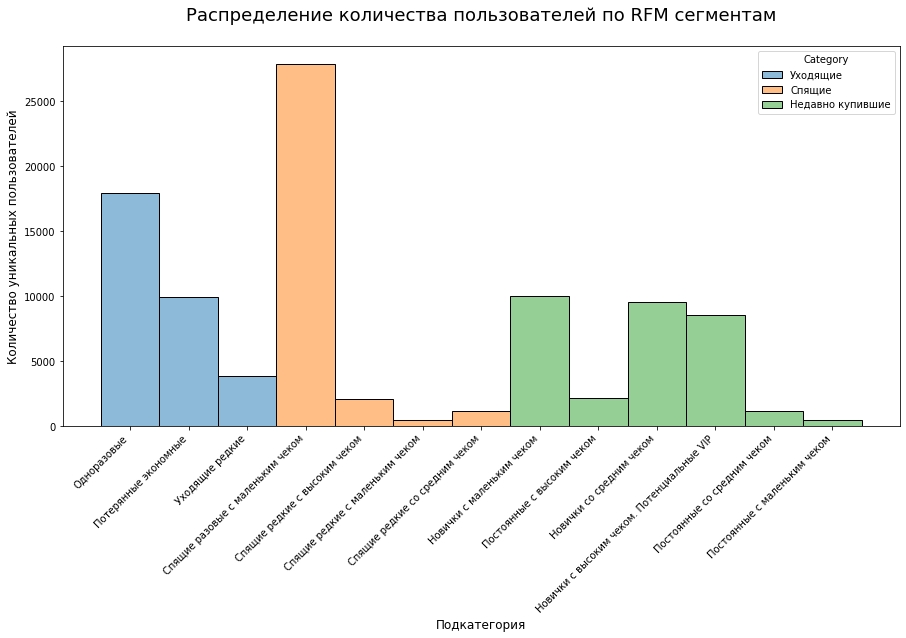

In [19]:
f, ax = plt.subplots(figsize=(15, 7))
sns.histplot(data=df_final_rfm.sort_values('Category', ascending=False), x='Subcategory', hue='Category', ax=ax)
plt.xticks(rotation=45, ha='right')
plt.title('Распределение количества пользователей по RFM сегментам', size=18, y=1.05)
plt.xlabel('Подкатегория', fontsize=12)
plt.ylabel('Количество уникальных пользователей', fontsize=12)